In [1]:
from sklearn.datasets import load_digits # load the MNIST dataset onto our notebook from sklearn's repository. sklearn, as per WoC's rules, won't be used while setting up my LR model
from sklearn.model_selection import train_test_split # to split the dataset into training and testing sets
import numpy as np
import matplotlib.pyplot as plt

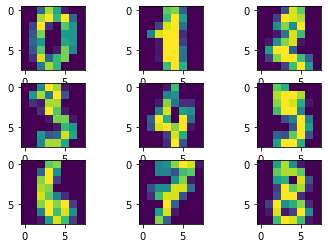

In [2]:
digits = load_digits() #viewing all the digits from the MNIST dataset

f, axis = plt.subplots(3,3)
axis[0,0].imshow(digits.images[0])
axis[0,1].imshow(digits.images[1])
axis[0,2].imshow(digits.images[2])
axis[1,0].imshow(digits.images[3])
axis[1,1].imshow(digits.images[4])
axis[1,2].imshow(digits.images[5])
axis[2,0].imshow(digits.images[6])
axis[2,1].imshow(digits.images[7])
axis[2,2].imshow(digits.images[8])
plt.show()

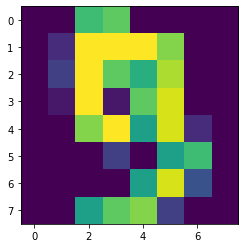

In [3]:
plt.imshow(digits.images[9]) # as DIGIT 9 was left out above

In [4]:
class LogisticRegression():     # Class for training and using a model for logistic regression
    
    
    def set_values(self, initial_params, alpha=0.01, max_iter=5000, class_of_interest=0): 
        
        #using self as it increases the readibility of the code
        
        #Setting the values 
        
        self.params = initial_params                          # initial params
        self.alpha = alpha                                    # step size 
        self.max_iter = max_iter                              # maximum iteration
        self.class_of_interest = class_of_interest            #class of interest (means whic)
        
    
    @staticmethod
    def _sigmoid(x): #Sigmoid function block
        
        
        return 1.0 / (1.0 + np.exp(-x))
    
    def predict(self, x_bar, params): #to predict the probability of a class 
        
                
        return self._sigmoid(np.dot(params, x_bar))
    
    def _compute_cost(self, input_var, output_var, params): #cost function block
        
        
        cost = 0
        for x, y in zip(input_var, output_var):
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, params)
            
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            cost += y_binary * np.log(y_hat) + (1.0 - y_binary) * np.log(1 - y_hat)
            
        return cost
    
    def train(self, input_var, label, print_iter = 5000): #Training the model using batch gradient ascent
        
        
        iteration = 1
        while iteration < self.max_iter:
            if iteration % print_iter == 0:
                print(f'iteration: {iteration}')
                print(f'cost: {self._compute_cost(input_var, label, self.params)}')
                print('--------------------------------------------')
            
            for i, xy in enumerate(zip(input_var, label)):
                x_bar = np.array(np.insert(xy[0], 0, 1))
                y_hat = self.predict(x_bar, self.params)
                
                y_binary = 1.0 if xy[1] == self.class_of_interest else 0.0
                gradient = (y_binary - y_hat) * x_bar
                self.params += self.alpha * gradient
            
            iteration +=1
        
        return self.params

    def test(self, input_test, label_test): #Test the accuracy of the model using test data
        
        self.total_classifications = 0
        self.correct_classifications = 0
        
        for x,y in zip(input_test, label_test):
            self.total_classifications += 1
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, self.params)
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            
            if y_hat >= 0.5 and  y_binary == 1:
                # correct classification of class_of_interest
                self.correct_classifications += 1
              
            if y_hat < 0.5 and  y_binary != 1:
                # correct classification of an other class
                self.correct_classifications += 1
                
        self.accuracy = self.correct_classifications / self.total_classifications
            
        return self.accuracy

In [5]:
# splitting the data into training and test sets
digits_train, digits_test, digits_label_train, digits_label_test =\
train_test_split(digits.data, digits.target, test_size=0.20)

In [6]:
# training a classifier for the ZERO digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_0 = LogisticRegression()
digits_regression_model_0.set_values(params_0, alpha, max_iter, 0)

params =\
digits_regression_model_0.train(digits_train / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -1.853426664197606
--------------------------------------------
iteration: 2000
cost: -1.0356639989900578
--------------------------------------------
iteration: 3000
cost: -0.7257265751722208
--------------------------------------------
iteration: 4000
cost: -0.5608551799783381
--------------------------------------------
iteration: 5000
cost: -0.45802835104316536
--------------------------------------------
iteration: 6000
cost: -0.3875833918322774
--------------------------------------------
iteration: 7000
cost: -0.33621950916475807
--------------------------------------------
iteration: 8000
cost: -0.29706458136899483
--------------------------------------------
iteration: 9000
cost: -0.26620291141214397
--------------------------------------------


In [7]:
# accuracy
digits_accuracy = digits_regression_model_0.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a ZERO digit in test set: {digits_accuracy}')

Accuracy of prediciting a ZERO digit in test set: 1.0


In [8]:
# train a classifier for the ONE digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_1 = LogisticRegression()
digits_regression_model_1.set_values(params_0, alpha, max_iter, 1)

params =\
digits_regression_model_1.train(digits_train / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -31.59421522993947
--------------------------------------------
iteration: 2000
cost: -25.04631372308603
--------------------------------------------
iteration: 3000
cost: -21.871596270422838
--------------------------------------------
iteration: 4000
cost: -19.879985078607483
--------------------------------------------
iteration: 5000
cost: -18.465791732852715
--------------------------------------------
iteration: 6000
cost: -17.383636164799714
--------------------------------------------
iteration: 7000
cost: -16.512885831197675
--------------------------------------------
iteration: 8000
cost: -15.786626900463263
--------------------------------------------
iteration: 9000
cost: -15.164492052585539
--------------------------------------------


In [9]:
#accuracy
digits_accuracy = digits_regression_model_1.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a ONE digit in test set: {digits_accuracy}')

Accuracy of prediciting a ONE digit in test set: 0.9833333333333333
